In [1]:
#add ai model import here
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

Training and test dataset setup

In [3]:
data = pd.read_csv('./mushrooms.csv')

In [4]:
#input features
X = data.drop('class', axis = 1)

In [5]:
y = data['class'].values

In [6]:
#turns the char values into columns of int 0 and 1 (truth table)
#example: odor = 'n' becomes odor_n = 0 or odor_n = 1
X = pd.get_dummies(X)

In [7]:
#splits the data set into a traing and test set wherein the test set is 30% of the data set. random
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model Creation and Training

In [8]:
# imports
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Activation = ReLU

In [9]:
mlp_clf_relu = MLPClassifier(max_iter=400, random_state=42, activation="relu")

In [11]:
cross_val_score(mlp_clf_relu, X_train, y_train, cv=3, scoring="accuracy")

array([1., 1., 1.])

In [12]:
y_mushroom_pred = cross_val_predict(mlp_clf_relu, X_train, y_train, cv=3)

In [13]:
#outputs confusion matrix
# [TN][FP]
# [FN][TP]
# false positive: dangerous (labeled edible but actually poisonous)

cm = confusion_matrix(y_train,y_mushroom_pred)
cm

array([[2951,    0],
       [   0, 2735]])

In [14]:
#accuracy score
acs = accuracy_score(y_train,y_mushroom_pred)

#precision score
#precision should be very high to avoid false positives
ps =precision_score(y_train,y_mushroom_pred, average = "macro")
#recall score
rs = recall_score(y_train, y_mushroom_pred, pos_label='e')
#f1 score
fs =f1_score(y_train, y_mushroom_pred, pos_label='e')

print("Accuracy Score: ", acs)
print("Precision Score: ", ps)
print("Recall Score: ", rs)
print("F1 Score: ", fs)

Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0


Activation = Identity

In [16]:
mlp_clf_identity = MLPClassifier(max_iter=400, random_state=42, activation="identity")
cross_val_score(mlp_clf_identity, X_train, y_train, cv=3, scoring="accuracy")
y_mushroom_pred = cross_val_predict(mlp_clf_identity, X_train, y_train, cv=3)

cm = confusion_matrix(y_train,y_mushroom_pred)
cm

array([[2951,    0],
       [   1, 2734]])

In [17]:
#accuracy score
acs = accuracy_score(y_train,y_mushroom_pred)
#precision score
#precision should be very high to avoid false positives
ps =precision_score(y_train,y_mushroom_pred, average = "macro")
#recall score
rs = recall_score(y_train, y_mushroom_pred, pos_label='e')
#f1 score
fs =f1_score(y_train, y_mushroom_pred, pos_label='e')

print("Accuracy Score: ", acs)
print("Precision Score: ", ps)
print("Recall Score: ", rs)
print("F1 Score: ", fs)

Accuracy Score:  0.9998241294407316
Precision Score:  0.9998306233062331
Recall Score:  1.0
F1 Score:  0.9998305946129087


Activation = Logistic

In [18]:
mlp_clf_logistic = MLPClassifier(max_iter=400, random_state=42, activation="logistic")
cross_val_score(mlp_clf_logistic, X_train, y_train, cv=3, scoring="accuracy")
y_mushroom_pred = cross_val_predict(mlp_clf_logistic, X_train, y_train, cv=3)

cm = confusion_matrix(y_train,y_mushroom_pred)
cm

#accuracy score
acs = accuracy_score(y_train,y_mushroom_pred)

#precision score
#precision should be very high to avoid false positives
ps =precision_score(y_train,y_mushroom_pred, average = "macro")
#recall score
rs = recall_score(y_train, y_mushroom_pred, pos_label='e')
#f1 score
fs =f1_score(y_train, y_mushroom_pred, pos_label='e')

print("Accuracy Score: ", acs)
print("Precision Score: ", ps)
print("Recall Score: ", rs)
print("F1 Score: ", fs)

Accuracy Score:  0.9996482588814632
Precision Score:  0.9996613613274636
Recall Score:  1.0
F1 Score:  0.999661246612466


Activation = Tanh

In [19]:
mlp_clf_tanh = MLPClassifier(max_iter=400, random_state=42, activation="tanh")
cross_val_score(mlp_clf_tanh, X_train, y_train, cv=3, scoring="accuracy")
y_mushroom_pred = cross_val_predict(mlp_clf_tanh, X_train, y_train, cv=3)

cm = confusion_matrix(y_train,y_mushroom_pred)
cm

#accuracy score
acs = accuracy_score(y_train,y_mushroom_pred)

#precision score
#precision should be very high to avoid false positives
ps =precision_score(y_train,y_mushroom_pred, average = "macro")
#recall score
rs = recall_score(y_train, y_mushroom_pred, pos_label='e')
#f1 score
fs =f1_score(y_train, y_mushroom_pred, pos_label='e')

print("Accuracy Score: ", acs)
print("Precision Score: ", ps)
print("Recall Score: ", rs)
print("F1 Score: ", fs)

Accuracy Score:  0.9998241294407316
Precision Score:  0.9998306233062331
Recall Score:  1.0
F1 Score:  0.9998305946129087


In [20]:
mlp_clf_relu.fit(X_test,y_test)

MLPClassifier(max_iter=400, random_state=42)

In [22]:
#Test set
test_pred = mlp_clf_relu.predict(X_test)
cm = confusion_matrix(y_test,test_pred)
cm

array([[1257,    0],
       [   0, 1181]])

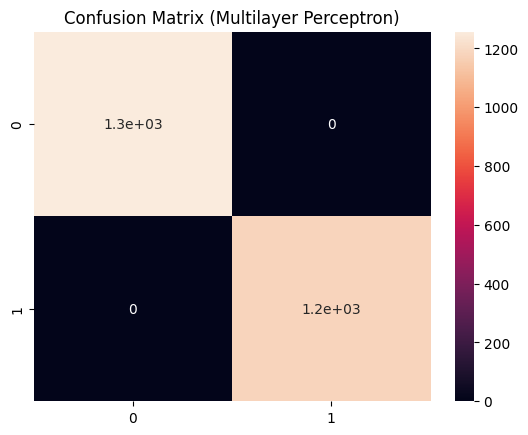

In [23]:
import seaborn as sb
import matplotlib.pyplot as plt

cmg = sb.heatmap(cm, annot=True)
plt.title("Confusion Matrix (Multilayer Perceptron)")
plt.savefig('Multilayer Perceptron Test Data Confusion Matrix.png', dpi=300, bbox_inches='tight')

In [24]:
acs_test = accuracy_score(y_test,test_pred)
ps_test = precision_score(y_test,test_pred, average = "macro")
rs_test = recall_score(y_test,test_pred, pos_label='e')
fs_test = f1_score(y_test,test_pred, pos_label='e')

print("Accuracy Score: ", acs_test)
print("Precision Score: ", ps_test)
print("Recall Score: ", rs_test)
print("F1 Score: ", fs_test)

Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
